In [112]:
from gensim.models import Doc2Vec

model = Doc2Vec.load("doc2vec/model_200_new_labels.d2v")

print("Facebook : {}\n".format(model.most_similar('facebook')))
print("Basketball : {}\n".format(model.most_similar('basketbal')))
print("iPhone : {}\n".format(model.most_similar('iphon')))
print("Samsung : {}\n".format(model.most_similar('samsung')))
print("Ebola : {}".format(model.most_similar('ebola')))

Facebook : [('googl', 0.681403398513794), ('microsoft', 0.6572470664978027), ('twitter', 0.633976936340332), ('appl', 0.6200909614562988), ('yahoo', 0.6191563010215759), ('blackberri', 0.606964111328125), ('samsung', 0.5834622979164124), ('fb', 0.5829420685768127), ('amazon', 0.5828678607940674), ('nest', 0.5739060044288635)]

Basketball : [('bartend', 0.31257736682891846), ('mona', 0.3075116276741028), ('urin', 0.30186474323272705), ('basebal', 0.30124229192733765), ('doodl', 0.29841578006744385), ('pauley', 0.29691267013549805), ('lesnar', 0.2958248257637024), ('avenu', 0.2956758737564087), ('dynasti', 0.2955247163772583), ('westero', 0.2943871319293976)]

iPhone : [('nexus', 0.7360390424728394), ('io', 0.6864740252494812), ('inch', 0.6613926291465759), ('window', 0.629806637763977), ('appl', 0.615291953086853), ('ipad', 0.6109374761581421), ('phone', 0.60696941614151), ('samsung', 0.6000809669494629), ('htc', 0.588702917098999), ('tab', 0.5780853033065796)]

Samsung : [('iphon', 0.6

In [113]:
import random
import numpy as np
import pickle

with open("lists/title/list_tokenized_docs.txt", "rb") as tokenized_docs:
    tokenized_docs = pickle.load(tokenized_docs)
    doc_id = np.random.randint(model.docvecs.count)  # pick random doc, re-run cell for more examples
    print(model.docvecs[doc_id])
    print(doc_id)
    sims = model.docvecs.most_similar(doc_id, topn=model.docvecs.count)  # get *all* similar documents
    print(u'TARGET (%d): «%s»\n' % (doc_id, ' '.join(tokenized_docs[doc_id])))
    print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
    for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
        print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(tokenized_docs[sims[index][0]])))

[ 0.30936119 -0.28059232  0.86213762 -1.00639248  0.47822735 -0.08998892
  0.17945121 -0.10510612 -0.6108709  -0.15766922  1.39069319 -2.77905631
 -0.43724391 -0.72940969  0.92308074  1.65690863 -0.97315365  0.31869775
  2.29083514 -0.31107992  1.09446979 -0.12863037  0.14457978  1.20887077
 -1.39612055 -1.37423289 -0.84300053  0.0948894  -1.37449527  0.25278273
 -0.2586467  -0.25321713  0.45365408 -0.79448152  1.55412209 -0.28913608
  0.08625212  1.63277686  0.54947209 -0.48018569 -1.29495335 -0.92815328
 -1.94837713 -1.763587    0.24844122 -0.99228287 -1.23004758  0.4968335
  0.57821685  1.82957101  1.36104214  1.67755389  0.02164018 -1.81178772
  0.7579596   1.53240252  0.23366617 -0.71851516  1.84878182 -0.95501971
 -0.73201221  0.83564651  1.07310545 -0.05441575 -0.95565474 -1.76627803
 -0.56223887 -1.50060093 -0.8113758  -1.27100074  0.66717356 -0.70229381
 -0.30599713 -0.46679828  0.2041844   1.38211977 -0.08256876 -0.77737308
 -0.9123165  -0.8417086  -0.04310815 -0.06285749 -1.

MemoryError: 

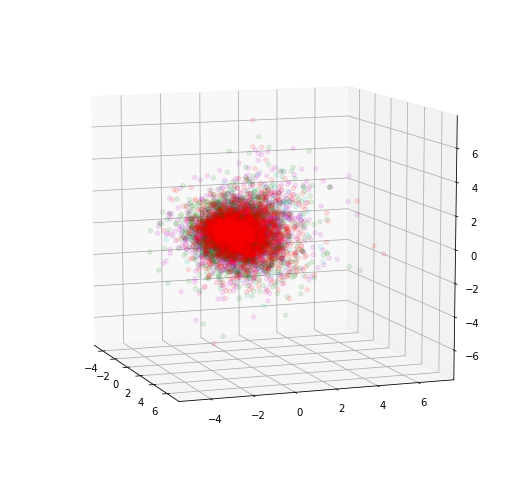

In [114]:
"""
Let's plot our data to see if some clusters appear
"""
import pandas as pd
from sklearn.decomposition import PCA
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Plot colours
colors = ['b', 'g', 'r', 'c', 'm', 'y']

with open("lists/title/labels.txt", "rb") as labels:
    y = np.array(pickle.load(labels)[0:10000])
    pca = PCA(n_components=3)
    vectors = model.docvecs.doctag_syn0[0:10000]
    transform = pd.DataFrame(pca.fit(vectors).transform(vectors))
    
    # Plotting it after categorizing it
    fig = plt.figure(figsize=(9, 8.5))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(1, 5):
        ax.scatter(transform[y == i][0], transform[y == i][1], transform[y == i][2], alpha=0.1, color=colors[i])
    for ii in range(0,360,20):
        ax.view_init(elev=10., azim=ii)
        plt.savefig("dessins_doc2vec/movie_%d.png" % ii)
plt.show()